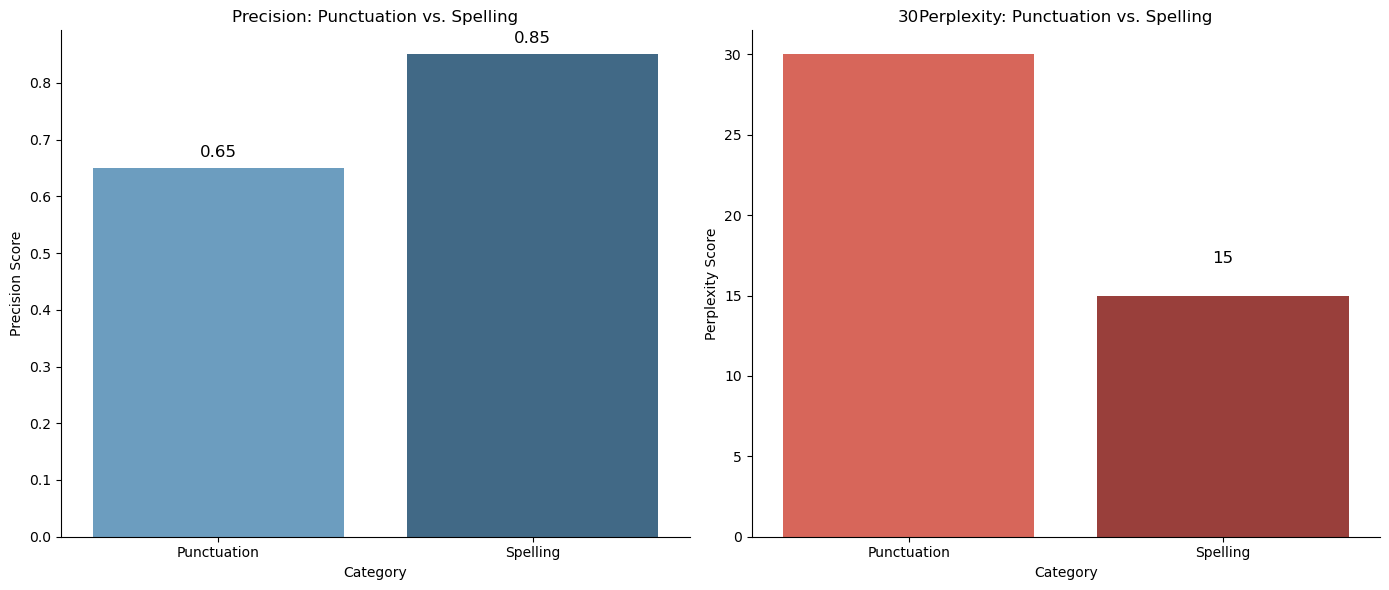

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Данные для графиков
categories = ['Punctuation', 'Spelling']
precision = [0.65, 0.85]
perplexity = [30, 15]

# Создаем холст с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# График для Precision
sns.barplot(x=categories, y=precision, ax=axes[0], palette="Blues_d")
axes[0].set_title('Precision: Punctuation vs. Spelling')
axes[0].set_ylabel('Precision Score')
axes[0].set_xlabel('Category')
for index, value in enumerate(precision):
    axes[0].text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# График для Perplexity
sns.barplot(x=categories, y=perplexity, ax=axes[1], palette="Reds_d")
axes[1].set_title('Perplexity: Punctuation vs. Spelling')
axes[1].set_ylabel('Perplexity Score')
axes[1].set_xlabel('Category')
for index, value in enumerate(perplexity):
    axes[1].text(index, value + 2, f'{value:.0f}', ha='center', fontsize=12)

# Улучшаем внешний вид
sns.despine()
plt.tight_layout()

# Показать график
plt.show()


# Обработка текстов

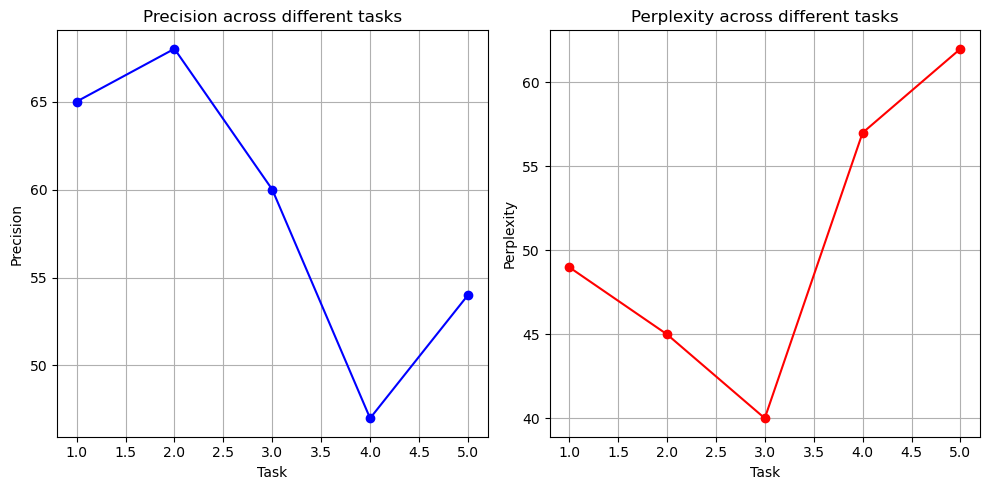

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Создание искусственных данных для Precision и Perplexity
x = np.arange(1, 6)  # Шкала для значений (например, разные задачи или параметры)
precision_values = [65, 68, 60, 47, 54]
perplexity_values = [49, 45, 40, 57, 62]

# Создание графика для Precision
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, precision_values, marker='o', linestyle='-', color='b')
plt.title('Precision across different tasks')
plt.xlabel('Task')
plt.ylabel('Precision')
plt.grid(True)

# Создание графика для Perplexity
plt.subplot(1, 2, 2)
plt.plot(x, perplexity_values, marker='o', linestyle='-', color='r')
plt.title('Perplexity across different tasks')
plt.xlabel('Task')
plt.ylabel('Perplexity')
plt.grid(True)

# Отображение графиков
plt.tight_layout()
plt.show()


In [2]:
import bz2
import xml.etree.ElementTree as ET
import pandas as pd
import nltk

# Максимальное количество токенов
MAX_TOKENS = 512

# Функция для токенизации
def tokenize(text):
    return nltk.word_tokenize(text)

# Открываем сжатый файл и читаем его содержимое
with bz2.open('./datasets/punctuation/annot.opcorpora.xml.bz2', 'rb') as file:
    content = file.read()

# Парсим XML
root = ET.fromstring(content)

# Создаем списки для данных
sentences = []
punctuations = []

# Проходим по каждому предложению в файле
for text in root.iter('text'):
    for sentence in text.iter('source'):
        sentence_text = sentence.text.strip()
        
        # Токенизация предложения
        tokens = tokenize(sentence_text)
        
        # Проверяем, что длина токенов не превышает MAX_TOKENS
        if len(tokens) <= MAX_TOKENS:
            # Здесь можно добавить пунктуацию (если нужно)
            punct_sentence = ''.join([char for char in sentence_text if char in '.,!?;:'])
            
            # Добавляем предложение и пунктуацию в список
            sentences.append(sentence_text)
            punctuations.append(punct_sentence)
# Теперь списки `sentences` и `punctuations` содержат только предложения с допустимым количеством токенов

KeyboardInterrupt: 

In [2]:
# Создаем DataFrame
df = pd.DataFrame({
    'sentence': sentences,
    'punctuation': punctuations
})

# Просмотр первых строк датасета
df.head(20)

,sentence,punctuation
0,«Школа злословия» учит прикусить язык,
1,Сохранится ли градус дискуссии в новом сезоне?,?
2,Великолепная «Школа злословия» вернулась в эфи...,.
3,В истории программы это уже не первый «ребренд...,.
4,"Сейчас с трудом можно припомнить, что начинала...",",,,,."
5,Писательница Татьяна Толстая и сценаристка Дун...,.
6,"Впрочем, на канале «Культура» в роли телеведущ...",",,,,,."
7,В остальном «Школа злословия» представляла соб...,.
8,"Иногда и в самом деле не без злословия, а по б...",",,,,."
9,Потом проект переехал с «Культуры» на НТВ.,.


In [3]:
df.shape

(110304, 2)

In [4]:
import pandas as pd
import re

# Переименовываем столбец sentence в output
df.rename(columns={'sentence': 'output'}, inplace=True)

# Функция для удаления только запятых из строки
def remove_commas(text):
    return re.sub(r',', '', text)

# Создаем новый столбец input, очищенный от запятых
df['input'] = df['output'].apply(remove_commas)

# Просмотр первых строк измененного DataFrame
df.head()


,output,punctuation,input
0,«Школа злословия» учит прикусить язык,,«Школа злословия» учит прикусить язык
1,Сохранится ли градус дискуссии в новом сезоне?,?,Сохранится ли градус дискуссии в новом сезоне?
2,Великолепная «Школа злословия» вернулась в эфи...,.,Великолепная «Школа злословия» вернулась в эфи...
3,В истории программы это уже не первый «ребренд...,.,В истории программы это уже не первый «ребренд...
4,"Сейчас с трудом можно припомнить, что начинала...",",,,,.",Сейчас с трудом можно припомнить что начиналас...


In [5]:
# Оставляем только те строки, где в столбце output есть хотя бы одна запятая
df = df[df['output'].str.contains(',', na=False)]

# Проверяем, сколько строк осталось после фильтрации
print(f'Оставшиеся строки: {len(df)}')

Оставшиеся строки: 67598


In [6]:
import pandas as pd

# Пример DataFrame, если у вас его нет
# df = pd.DataFrame({'input': ['Это пример предложения', 'Еще одно предложение']})

def add_indices(sentence):
    words = sentence.split()  # Разделяем предложение на слова
    # Создаем новое предложение с номерами без пробелов
    indexed_sentence = ' '.join([f"{word}({i + 1})" for i, word in enumerate(words)])
    return indexed_sentence


# Применяем функцию к столбцу input
df['input'] = df['input'].apply(add_indices)

# Проверяем результат
df.head()


,output,punctuation,input
4,"Сейчас с трудом можно припомнить, что начинала...",",,,,.",Сейчас(1) с(2) трудом(3) можно(4) припомнить(5...
6,"Впрочем, на канале «Культура» в роли телеведущ...",",,,,,.",Впрочем(1) на(2) канале(3) «Культура»(4) в(5) ...
8,"Иногда и в самом деле не без злословия, а по б...",",,,,.",Иногда(1) и(2) в(3) самом(4) деле(5) не(6) без...
10,Это помимо явных перемен в виде тут же появивш...,",,,,,.",Это(1) помимо(2) явных(3) перемен(4) в(5) виде...
11,Набор героев программы расширился самым причуд...,",.",Набор(1) героев(2) программы(3) расширился(4) ...


In [7]:
import pandas as pd
import re  

def extract_indices(row):
    output_text = row['output']
    input_text = row['input']
    
    # Разделяем output и input на слова
    output_words = output_text.split()  # Разделяем output на слова
    input_words = input_text.split()  # Разделяем input на слова

    indices = []  # Список для хранения индексов

    #print(f"\nОбрабатываем строку:\nOutput: {output_text}\nInput: {input_text}")

    # Перебираем слова в output
    for i in range(len(output_words)):
        #print(f"Текущее слово в output: '{output_words[i]}' (индекс: {i})")

        # Проверяем, если текущее слово заканчивается запятой
        if output_words[i].endswith(','):
            # Убираем запятую для дальнейшей проверки
            word_before_comma = output_words[i][:-1]  # Слово без запятой
            #print(f"Слово перед запятой: '{word_before_comma}'")

            # Ищем это слово в input
            for j in range(len(input_words)):
                # Убираем индексы (например (1)) и пробелы
                clean_input_word = input_words[j].split('(')[0].strip()
                #print(f"Сравниваем с input: '{clean_input_word}' (индекс: {j})")

                if clean_input_word == word_before_comma:  
                    # Извлекаем индекс
                    index = input_words[j].split('(')[-1].strip(')')
                    indices.append(index)  # Сохраняем индекс
                    #print(f"Найдено соответствие! Индекс: {index}")
                    break  # Выход из цикла после нахождения

    answer = ' '.join(indices)  # Возвращаем номера через пробел
    #print(f"Ответ для этой строки: '{answer}'")
    return answer

# Применяем функцию к каждой строке DataFrame
df['answer'] = df.apply(extract_indices, axis=1)

# Проверяем результат
print("\nРезультаты:")
df[['output', 'input', 'answer']]



Результаты:


,output,input,answer
4,"Сейчас с трудом можно припомнить, что начинала...",Сейчас(1) с(2) трудом(3) можно(4) припомнить(5...,5 14 21 26
6,"Впрочем, на канале «Культура» в роли телеведущ...",Впрочем(1) на(2) канале(3) «Культура»(4) в(5) ...,1 10 12 20 27
8,"Иногда и в самом деле не без злословия, а по б...",Иногда(1) и(2) в(3) самом(4) деле(5) не(6) без...,8 16 26 30
10,Это помимо явных перемен в виде тут же появивш...,Это(1) помимо(2) явных(3) перемен(4) в(5) виде...,11 14 15 18 21
11,Набор героев программы расширился самым причуд...,Набор(1) героев(2) программы(3) расширился(4) ...,7
...,...,...,...
110297,"На небесной сфере существуют четыре точки, изл...",На(1) небесной(2) сфере(3) существуют(4) четыр...,6
110298,"• Точка Араго (А), названная в честь открывате...",•(1) Точка(2) Араго(3) (А)(4) названная(5) в(6...,8 10 23
110300,"• Точка Бабинэ (Ba), открыта Бабинэ в 1840 г.,...",•(1) Точка(2) Бабинэ(3) (Ba)(4) открыта(5) Баб...,9 14
110301,"• Точка Брюстера (Br), открыта Брюстером в 184...",•(1) Точка(2) Брюстера(3) (Br)(4) открыта(5) Б...,9 14


In [8]:
df = df[:-4]

In [9]:
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую + оценочную (85%) и тестовую выборки (15%)
train_eval_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

# Теперь разделяем train_eval_data на обучающую (70% от исходных данных) и оценочную (15% от исходных данных)
train_data, eval_data = train_test_split(train_eval_data, test_size=0.1765, random_state=42)  
# 0.1765 = 15% / 85% для пропорционального разделения на 15% от 85%

# Проверяем размеры выборок
print(f"Размер обучающей выборки: {train_data.shape}")
print(f"Размер оценочной выборки: {eval_data.shape}")
print(f"Размер тестовой выборки: {test_data.shape}")


Размер обучающей выборки: (41747, 4)
Размер оценочной выборки: (8948, 4)
Размер тестовой выборки: (16899, 4)


In [10]:
df

,output,punctuation,input,answer
4,"Сейчас с трудом можно припомнить, что начинала...",",,,,.",Сейчас(1) с(2) трудом(3) можно(4) припомнить(5...,5 14 21 26
6,"Впрочем, на канале «Культура» в роли телеведущ...",",,,,,.",Впрочем(1) на(2) канале(3) «Культура»(4) в(5) ...,1 10 12 20 27
8,"Иногда и в самом деле не без злословия, а по б...",",,,,.",Иногда(1) и(2) в(3) самом(4) деле(5) не(6) без...,8 16 26 30
10,Это помимо явных перемен в виде тут же появивш...,",,,,,.",Это(1) помимо(2) явных(3) перемен(4) в(5) виде...,11 14 15 18 21
11,Набор героев программы расширился самым причуд...,",.",Набор(1) героев(2) программы(3) расширился(4) ...,7
...,...,...,...,...
110291,"Капель много, и каждая имеет свою форму и, сле...",",,,.",Капель(1) много(2) и(3) каждая(4) имеет(5) сво...,2 3 9
110292,"То есть облака рассеивают свет от неба, и в ре...",",.",То(1) есть(2) облака(3) рассеивают(4) свет(5) ...,7
110293,"Если облака имеют большие размеры, то часть св...",",,.",Если(1) облака(2) имеют(3) большие(4) размеры(...,5 9
110294,Излучение при рассеянии не очень меняется по с...,":,.",Излучение(1) при(2) рассеянии(3) не(4) очень(5...,15


In [11]:
# Сохраняем DataFrame в файл CSV
df.to_csv('labeled_dataset.csv', index=False, encoding='utf-8')

df.to_csv('test_dataset.csv', index=False, encoding='utf-8')
df.to_csv('eval_dataset.csv', index=False, encoding='utf-8')
df.to_csv('train_dataset.csv', index=False, encoding='utf-8')

